In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [2]:
# 1. Load Dataset
df = pd.read_csv("knn_telecom.csv")


In [3]:
# 2. Encode Categorical Variables
le_gender = LabelEncoder()
le_plan = LabelEncoder()

df["Gender"] = le_gender.fit_transform(df["Gender"])
df["PlanType"] = le_plan.fit_transform(df["PlanType"])

In [4]:
# 3. Separate Features and Target
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [5]:
# 4. Feature Scaling (Required for KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# 5. Cross Validation Setup
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

k_values = range(1, 8)
cv_scores = []

In [7]:
# 6. Train and Evaluate for Different K Values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=skf, scoring="accuracy")
    cv_scores.append(scores.mean())
    print(f"K = {k}, Accuracy = {scores.mean():.4f}")

K = 1, Accuracy = 0.9667
K = 2, Accuracy = 0.9533
K = 3, Accuracy = 0.9733
K = 4, Accuracy = 0.9600
K = 5, Accuracy = 0.9733
K = 6, Accuracy = 0.9533
K = 7, Accuracy = 0.9533


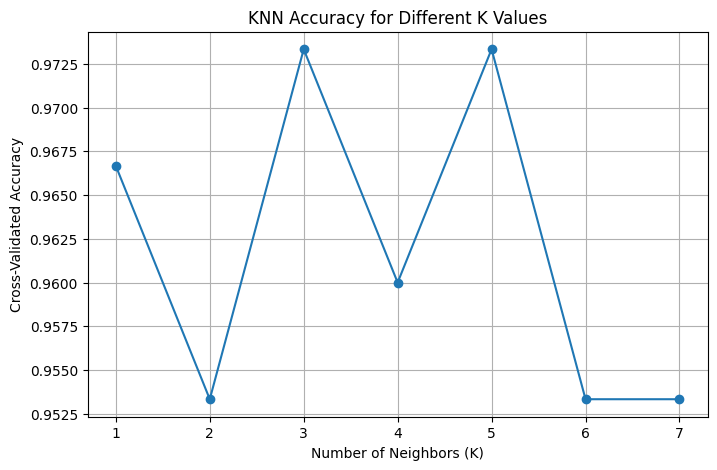

In [8]:
# 7. Plot Results
plt.figure(figsize=(8, 5))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Cross-Validated Accuracy")
plt.title("KNN Accuracy for Different K Values")
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [9]:
# 8. Best K
best_k = k_values[np.argmax(cv_scores)]
print(f"\nBest K: {best_k}")
print(f"Best Accuracy: {max(cv_scores):.4f}")


Best K: 3
Best Accuracy: 0.9733
